## **Heart Disease Prediction using Logistic Regression**

Heart disease is a common disease specially for aged people. There are some certain factors which cause angiographic disease. There are two csv files in kaggle (training and test). As we all know, data prepocessing, cleaning, feature selection and aggregation is very crucial to design a perfect model. Thus, I will try to do data preprocessing step by step and then Logistic Model will be used to train the dataset. Afterthat, as test dataset does not have class label, I will fit the test into training dataset and put a label whether they have heart disease or not.

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sci
import matplotlib.pyplot as matplt
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as matlab
%matplotlib inline

### **Loading Training Dataset**

#### **Independent Variables**

Column1: **age** as years <br>
Column2: **sex** as 1 = male, 0 = female <br>
Column3: **chest-pain type** as 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptotic <br>
Column4: **resting blood pressure** as mmHg (on hospital admission) <br>
Column5: **serum cholestrol** as mg/dl <br>
Column6: **fasting blood sugar** as (>120 mg/dl), 1 = true, 0 = false <br>
Column7: **resting ECG** 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hyperthrophy <br>
Column8: **max-heart rate achieved** as arbitrary value
Column9: **exercise induced angina** as 1 = yes, 0 = no <br>
Column10: **ST depression induced by exercise relative to rest** as arbitrary value <br>
Column11: **peak exercise ST segment** as 1 = upsloping, 2 = flat, 3 = downsloping <br>
Column12: **number of major vessels (0-3) colored by flourosopy** as 0-3 value <br>
Column13: **thal** as 3 = normal, 6 = fixed defect, 7 = reversable defect <br>

#### **Class Attributes**

Column14: **heart disease status** 0 = absence, 1,2,3,4 = presence

In [2]:
heart_train = pd.read_csv("/home/samiulengineer/Desktop/sami/data/heart_train.csv")
heart_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


### **Checking Data Types**

In [3]:
heart_train.dtypes

Column1      int64
Column2      int64
Column3      int64
Column4     object
Column5     object
Column6     object
Column7     object
Column8     object
Column9     object
Column10    object
Column11    object
Column12    object
Column13    object
Column14     int64
dtype: object

Column4 to Column13 have string values, basically '?' which can not be used machine learning model

### **Changing Data Types**

Change all data types and convert all '?' values to Nan values

In [4]:
heart_train['Column4'] = pd.to_numeric(heart_train['Column4'], errors = 'coerce')
heart_train['Column5'] = pd.to_numeric(heart_train['Column5'], errors = 'coerce')
heart_train['Column6'] = pd.to_numeric(heart_train['Column6'], errors = 'coerce')
heart_train['Column7'] = pd.to_numeric(heart_train['Column7'], errors = 'coerce')
heart_train['Column8'] = pd.to_numeric(heart_train['Column8'], errors = 'coerce')
heart_train['Column9'] = pd.to_numeric(heart_train['Column9'], errors = 'coerce')
heart_train['Column10'] = pd.to_numeric(heart_train['Column10'], errors = 'coerce')
heart_train['Column11'] = pd.to_numeric(heart_train['Column11'], errors = 'coerce')
heart_train['Column12'] = pd.to_numeric(heart_train['Column12'], errors = 'coerce')
heart_train['Column13'] = pd.to_numeric(heart_train['Column13'], errors = 'coerce')

In [5]:
heart_train.dtypes

Column1       int64
Column2       int64
Column3       int64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10    float64
Column11    float64
Column12    float64
Column13    float64
Column14      int64
dtype: object

Now, here all datatypes have been changed from string to float.

In [6]:
heart_train.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


### **Total Instances**

In [7]:
len(heart_train.index)

779

### **Changing Attributes Name**

In [8]:
heart_train.rename(columns={'Column1' : 'age', 'Column2' : 'sex', 'Column3' : 'chest_pain_type', 'Column4' : 'resting_bp', 
                           'Column5' : 'ser_chol', 'Column6' : 'fast_glucose', 'Column7' : 'rest_ecg', 'Column8' : 'heart_rate', 
                           'Column9' : 'exc_angina', 'Column10' : 'depression', 'Column11' : 'peak_exc', 'Column12' : 'maj_vessels',
                           'Column13' : 'thal', 'Column14' : 'CVD'}, inplace = True)
heart_train.head()

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal,CVD
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3


### **Checking Missing Values**

In [9]:
heart_train.isnull().sum()

age                  0
sex                  0
chest_pain_type      0
resting_bp          47
ser_chol            24
fast_glucose        78
rest_ecg             2
heart_rate          44
exc_angina          44
depression          49
peak_exc           262
maj_vessels        514
thal               408
CVD                  0
dtype: int64

In [10]:
count = 0
for i in heart_train.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print("%i instances have missing values which is %i%% of the total data" %(count, round((float(count)/len(heart_train.index))*100)))

523 instances have missing values which is 67% of the total data


In [11]:
len(heart_train.index)

779

### **Changing Class Attributes**

angiographic_disease has 5 types of values (0 = No, 1,2,3,4 = Yes)<br>
Change all 1,2,3,4 values to 1 (1 = yes)

In [12]:
heart_train['CVD'] = (heart_train['CVD'] >= 1).astype(int)

### **Dropout Missing Instances**

In [13]:
heart_train = heart_train.fillna(heart_train.mean())

### **Changing Data Types to Integer**

In [14]:
heart_train = heart_train.astype(int)

In [15]:
heart_train.dtypes

age                int64
sex                int64
chest_pain_type    int64
resting_bp         int64
ser_chol           int64
fast_glucose       int64
rest_ecg           int64
heart_rate         int64
exc_angina         int64
depression         int64
peak_exc           int64
maj_vessels        int64
thal               int64
CVD                int64
dtype: object

### **Visualize the Data**

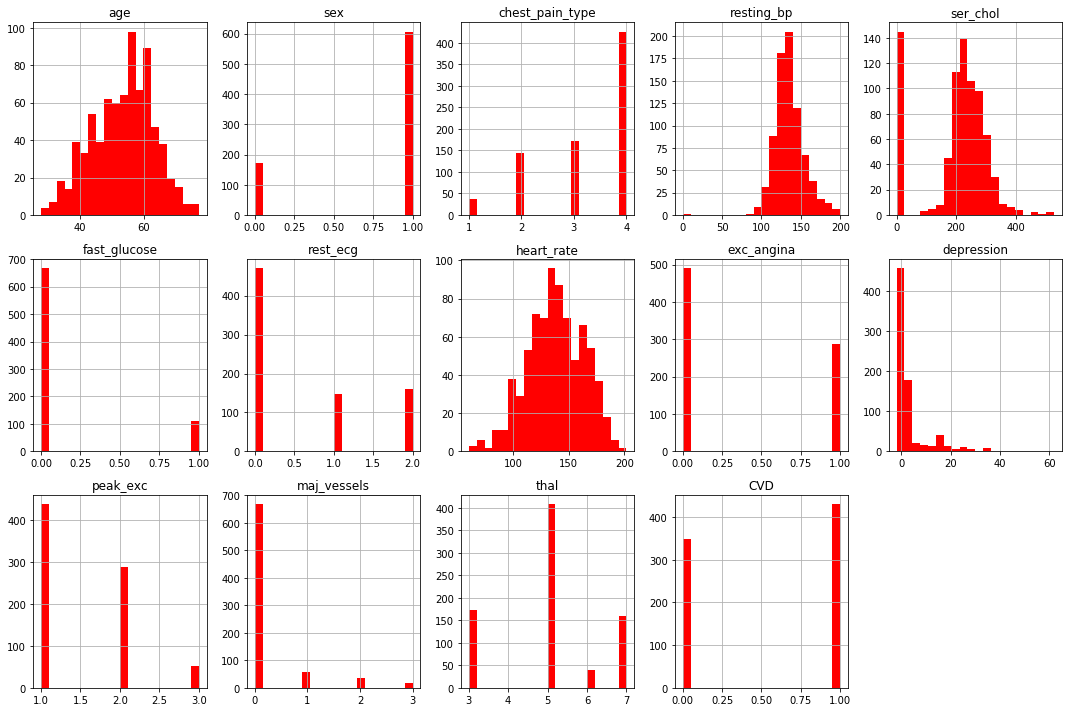

In [16]:
def histograms(df, ft, rw, cl):
    fig = matplt.figure(figsize = (15,10))
    
    for i, feature in enumerate (ft):
        ax = fig.add_subplot(rw, cl, i+1)
        df[feature].hist(bins = 20, ax = ax, facecolor = 'red')
        ax.set_title(feature)
    fig.tight_layout()
    matplt.show()
    fig.savefig('/home/samiulengineer/Desktop/sami/result_image/data_visualization.png')
histograms(heart_train, heart_train.columns, 3, 5)

### **Class Balance-Imbalance Check**

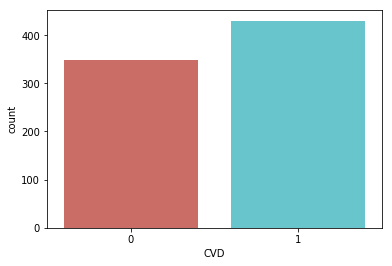

In [17]:
fig = sb.countplot(x = heart_train['CVD'], data = heart_train, palette = 'hls')


sb.axes_style("whitegrid")

fig.get_figure().savefig('/home/samiulengineer/Desktop/sami/result_image/class_balance_check.png')

In [18]:
(heart_train['CVD'].value_counts()/heart_train['CVD'].count())*100

1    55.198973
0    44.801027
Name: CVD, dtype: float64

In [19]:
(heart_train['CVD'].value_counts()/heart_train['CVD'].count())*100

1    55.198973
0    44.801027
Name: CVD, dtype: float64

Here, it is clearly visible that, class label distribution is balnced

### **Checking Impact Level on Class Attribute**

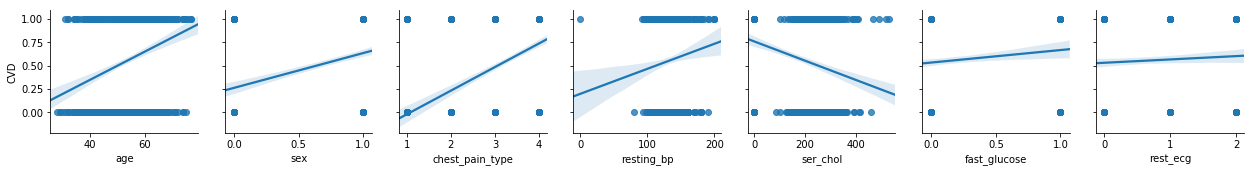

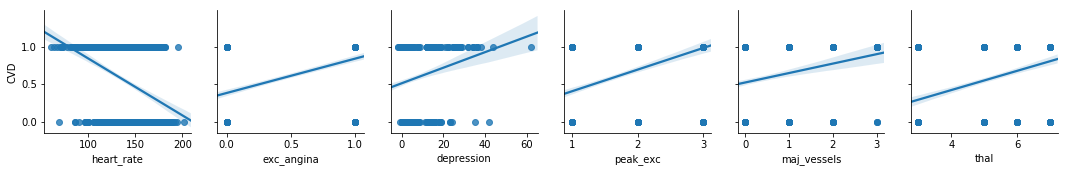

In [38]:
fig1 = sb.pairplot(data = heart_train, 
            y_vars = ['CVD'], 
            x_vars = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'ser_chol', 'fast_glucose','rest_ecg'], 
            kind = 'reg',
            diag_kind = 'kde'
           )

fig2 = sb.pairplot(data = heart_train, 
            y_vars = ['CVD'], 
            x_vars = ['heart_rate', 'exc_angina', 'depression', 'peak_exc', 'maj_vessels', 'thal'], kind = 'reg')

fig1.savefig('/home/samiulengineer/Desktop/sami/result_image/class_impact_attributes_1.png')
fig2.savefig('/home/samiulengineer/Desktop/sami/result_image/class_impact_attributes_2.png')

It is clear that, class label is fully balanced which is perfect for machine learning modeling

### **Understanding Data Structure**

In [21]:
heart_train.describe().style.set_precision(3)

,age,sex,chest_pain_type,resting_bp,ser_chol,fast_glucose,rest_ecg,heart_rate,exc_angina,depression,peak_exc,maj_vessels,thal,CVD
count,779,779,779,779,779,779,779,779,779,779,779,779,779,779
mean,53.5,0.779,3.26,132,200,0.142,0.602,138,0.37,3.84,1.51,0.234,5.01,0.552
std,9.51,0.415,0.926,18.5,108,0.35,0.809,25.3,0.483,7.56,0.622,0.635,1.33,0.498
min,28,0,1,0,0,0,0,60,0,-2,1,0,3,0
25%,47,1,3,120,179,0,0,120,0,0,1,0,5,0
50%,54,1,4,130,223,0,0,138,0,1,1,0,5,1
75%,60,1,4,140,269,0,1,157,1,3,2,0,6,1
max,77,1,4,200,529,1,2,202,1,62,3,3,7,1
